In [1]:
import sys
import os

In [2]:
sys.path.append(r'/home/marc/bin/spark/spark-1.6.3-bin-hadoop2.6/python/lib/py4j-0.9-src.zip')
sys.path.append(r'/home/marc/bin/spark/spark-1.6.3-bin-hadoop2.6/python/lib/pyspark.zip')
os.environ['SPARK_HOME'] = r"/home/marc/bin/spark/spark-1.6.3-bin-hadoop2.6"

In [6]:
from pyspark import SparkContext
sc = SparkContext(appName='notebook')
%load_ext autoreload
%autoreload 2
import correlations
import analysis_functions
import graphing_functions
import pitch_analysis
import numpy as np

In [7]:
music_brainz_rdd = sc.pickleFile('../data/musicbrainz-songs')
analysis_songs_rdd = sc.pickleFile(r'../data/analysis-songs')
metadata_songs_rdd = sc.pickleFile(r'../data/metadata-songs')
analysis_segments_timbre = sc.pickleFile(r'../data/analysis-segments_timbre')
analysis_segments_pitch = sc.pickleFile(r'../data/analysis-segments_pitches')

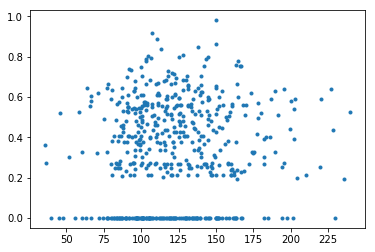

In [10]:
correlations.correlation_tempo(sc)

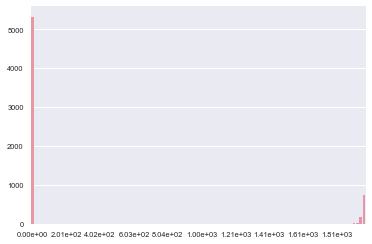

In [28]:
year = music_brainz_rdd.map(lambda x: (x[0], x[1]['year'][0])).filter(lambda x: not (int(x[1]) == 0))
print_histogram(get_histogram(year.map(lambda x: x[1]))[2])

In [56]:
year.filter(lambda x: not (int(x[1]) == 0)).count()

4680

In [67]:
tempo = analysis_songs_rdd.map(lambda x: (x[0], x[1]['tempo'][0]))\
            .filter(lambda x: analysis_functions.is_numeric(x[1]))

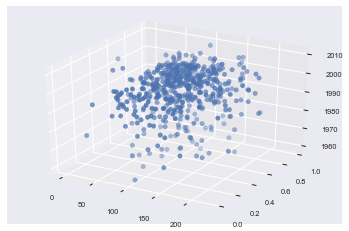

In [54]:
correlations.scatter_plot_with_song_hotness_and_year(tempo, metadata_songs_rdd, music_brainz_rdd)

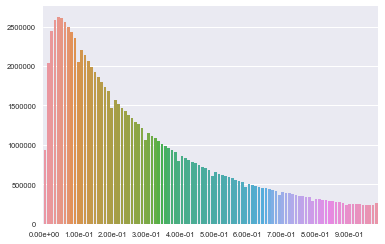

In [70]:
graphing_functions.print_histogram(analysis_functions.numeric_array_or_matrix_histogram(analysis_segments_pitch)[2])

In [56]:
sequence_pitch = pitch_analysis.get_most_popular_pitches_sequence_from_rdd(analysis_segments_pitch, 4, top=100, threshold=0.75, top_per_song=3)
pitch_analysis.pretty_print_sequence_list(sequence_pitch)

In [60]:
hotness = metadata_songs_rdd.map(lambda x: (x[0], x[1]['song_hotttnesss'][0])).filter(lambda x: analysis_functions.is_numeric(x[1]))
hotness.count()

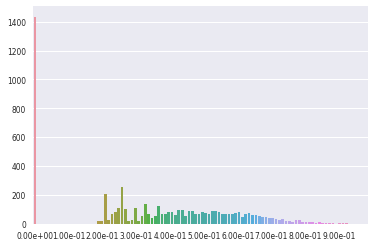

In [66]:
graphing_functions.print_histogram(analysis_functions.get_histogram(hotness.map(lambda x: x[1]), 100)[2])

In [68]:
analysis_segments_pitch.join(hotness).count()

5648

In [78]:
most_hot_pitches = analysis_segments_pitch.join(hotness.filter(lambda x : x[1] > 0.5))

In [79]:
most_hot_pitches.count()

1713

In [72]:
most_hot_pitches.first()

('TRAOOGD128F92E4768',
 (matrix([[ 1.   ,  0.918,  0.772, ...,  0.727,  0.526,  0.341],
          [ 0.326,  0.329,  0.205, ...,  1.   ,  0.336,  0.235],
          [ 0.151,  0.163,  0.079, ...,  1.   ,  0.931,  0.085],
          ..., 
          [ 0.486,  0.591,  0.367, ...,  0.458,  0.408,  0.509],
          [ 0.961,  0.371,  0.305, ...,  0.42 ,  0.505,  0.553],
          [ 0.747,  0.773,  0.467, ...,  0.446,  0.582,  0.57 ]]),
  0.81839437971637685))

In [82]:
hottest_sequence_pitch = pitch_analysis.get_most_popular_pitches_sequence_from_rdd\
    (most_hot_pitches.map(lambda x: (x[0], x[1][0])), 16, top=100, threshold=0.85, top_per_song=3)

In [75]:
pitch_analysis.pretty_print_sequence_list(hottest_sequence_pitch)

Sequence 0 with 294 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
()
Sequence 1 with 36 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
()
Sequence 2 with 32 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
()
Sequence 3 with 23 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0)
()
Sequence 4 with 17 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
()
Sequence 5 with 17 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 

In [77]:
pitch_analysis.pretty_print_sequence_list(hottest_sequence_pitch)

Sequence 0 with 25 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
()
Sequence 1 with 1 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0)
(0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,0)
(0 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,0 ,0

Sequence 62 with 1 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0)
(0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0)
(0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0)
(1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0)
(0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
()
Sequence 63 with 1 occurrences
(1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1)
(0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,

In [81]:
pitch_analysis.pretty_print_sequence_list(hottest_sequence_pitch)

Sequence 0 with 121 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
()
Sequence 1 with 4 occurrences
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,

(1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,1)
()
Sequence 82 with 1 occurrences
(1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0)
(0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0)
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0)
(0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,

In [83]:
pitch_analysis.pretty_print_sequence_list(hottest_sequence_pitch)

Sequence 0 with 167 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
()
Sequence 1 with 8 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,

(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
()
Sequence 73 with 1 occurrences
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
()
Sequence 74 with 1 occurrences
(1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0)
(1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1)
(0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0)
(0 ,0 ,